In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', '{:.1f}'.format)

In [4]:
df = pd.read_csv("E:\OneDrive\Desktop\heart.csv")

In [5]:
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[numerical_columns].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.0,0.3,-0.1,-0.4,0.3
RestingBP,0.3,1.0,0.1,-0.1,0.2
Cholesterol,-0.1,0.1,1.0,0.2,0.1
MaxHR,-0.4,-0.1,0.2,1.0,-0.2
Oldpeak,0.3,0.2,0.1,-0.2,1.0


<Axes: >

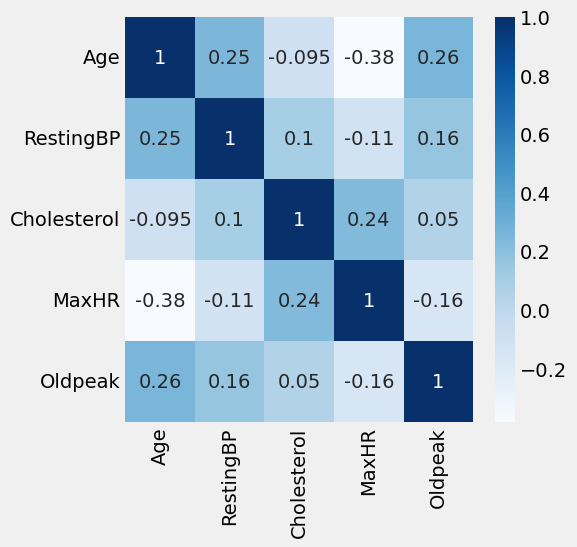

In [6]:
#heatmap for clear image of correlation
plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), annot = True, cbar = True, cmap = "Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

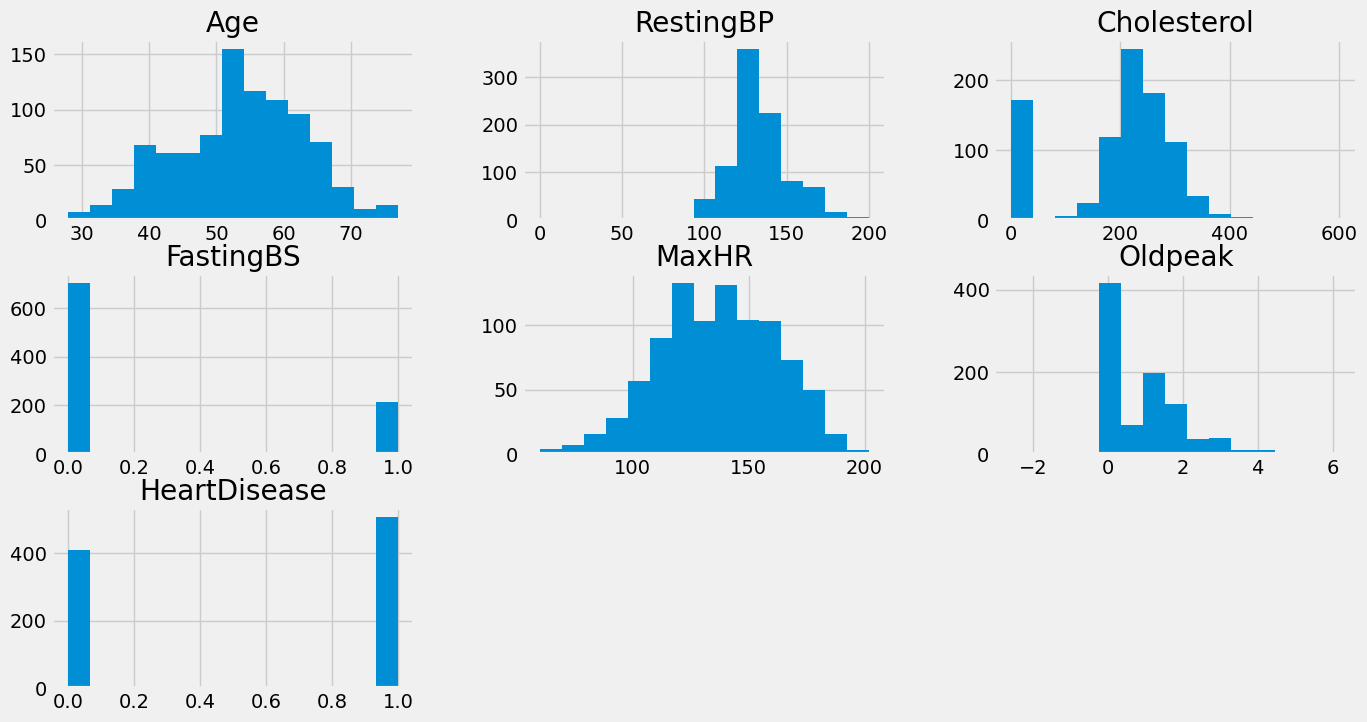

In [7]:
#histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

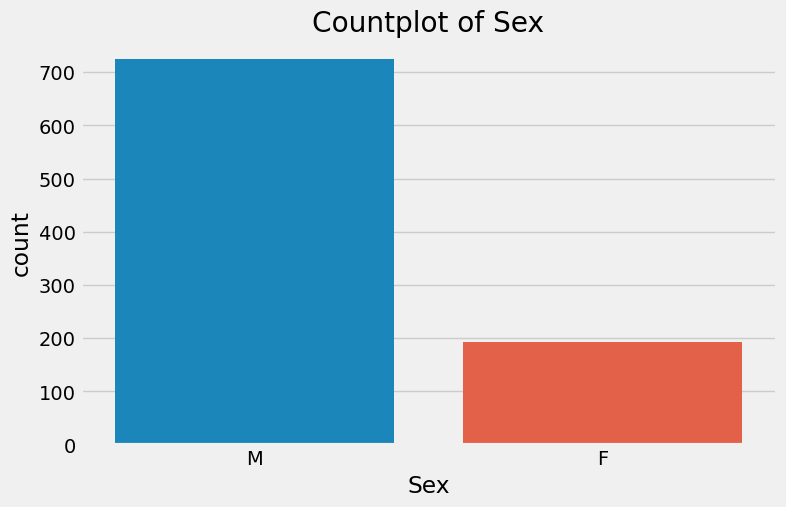

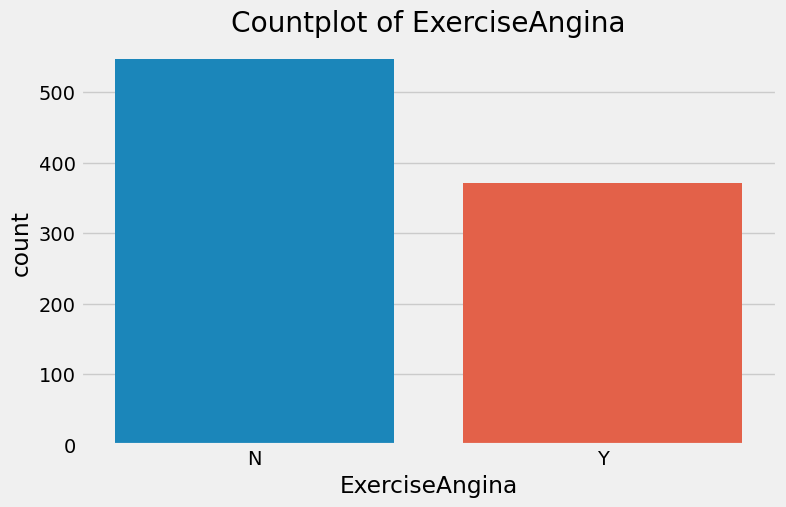

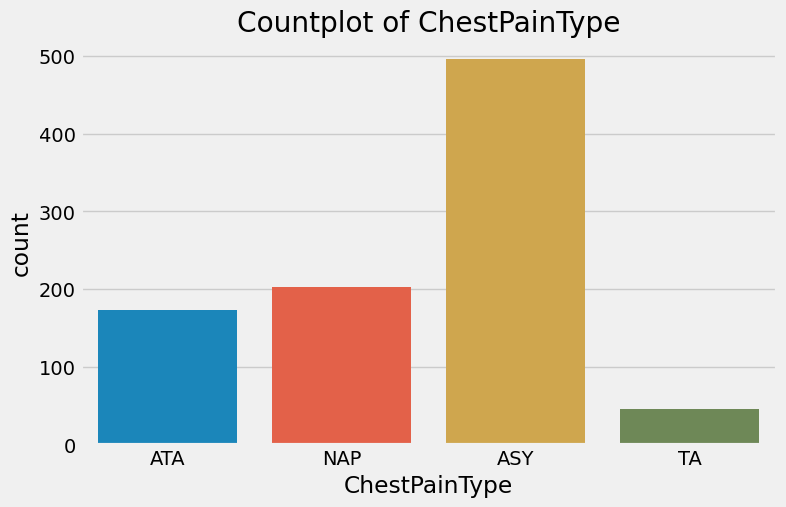

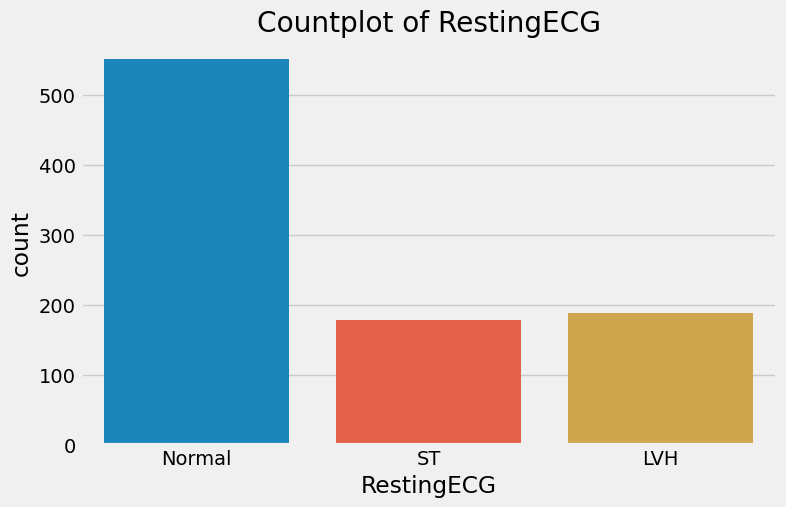

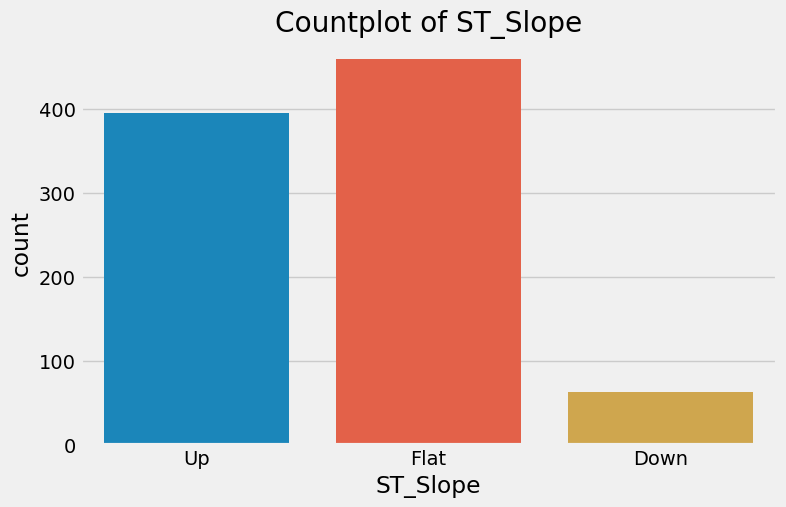

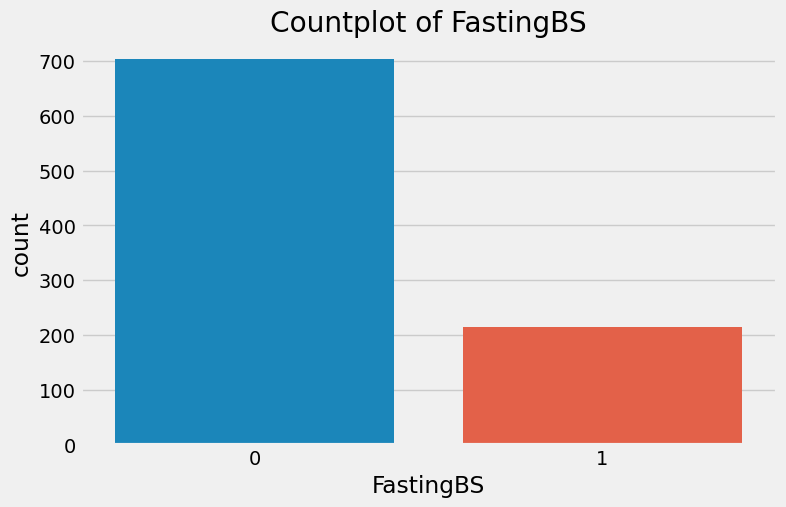

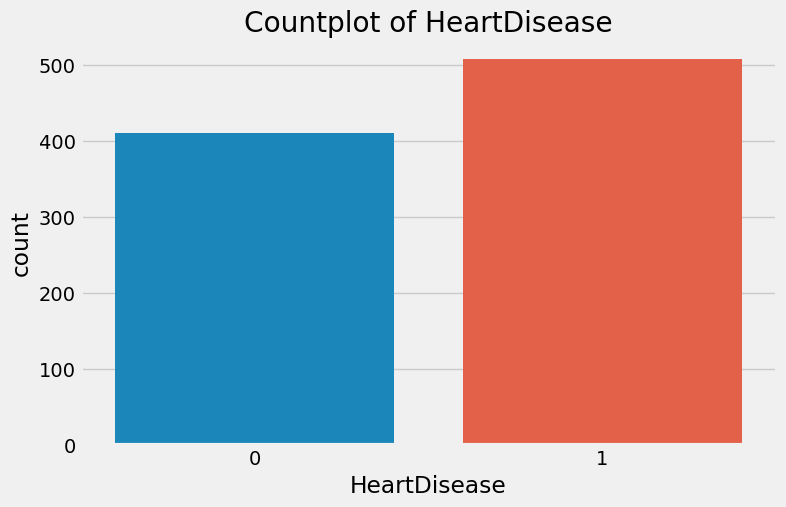

In [8]:
#countplots for caategorical columns
categorical_columns = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope", "FastingBS", "HeartDisease"]
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.show()

Text(32.45833333333333, 0.5, 'RestingBP')

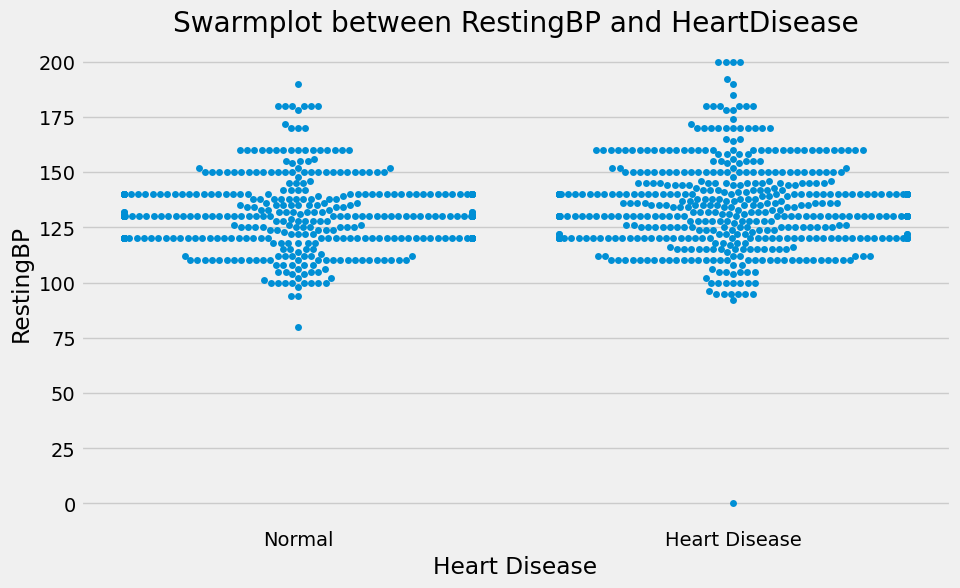

In [9]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'HeartDisease', y = 'RestingBP', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Swarmplot between RestingBP and HeartDisease')
plt.xlabel('Heart Disease')
plt.ylabel('RestingBP')

Text(32.45833333333333, 0.5, 'Cholesterol')

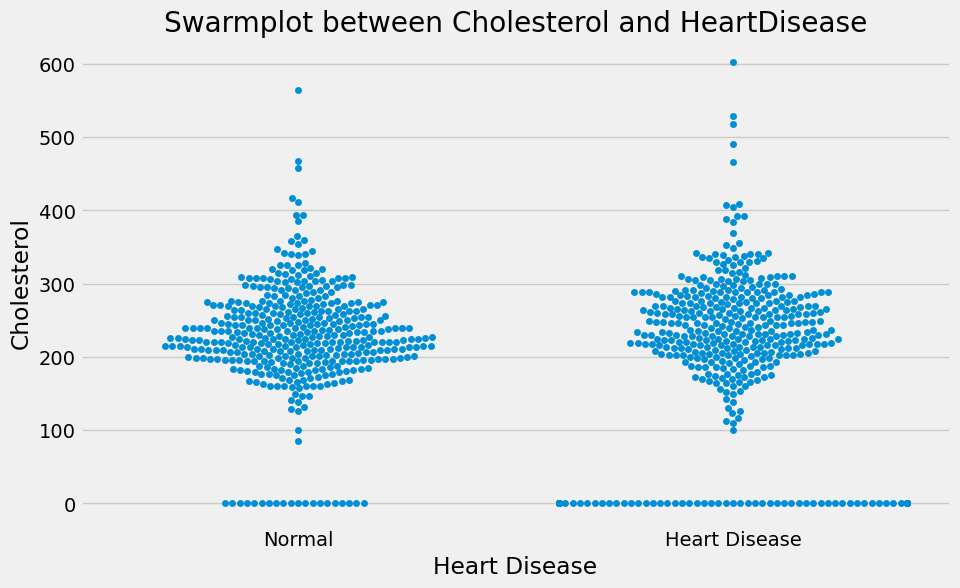

In [10]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'HeartDisease', y = 'Cholesterol', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Swarmplot between Cholesterol and HeartDisease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')

Text(32.45833333333333, 0.5, 'MaxHR')

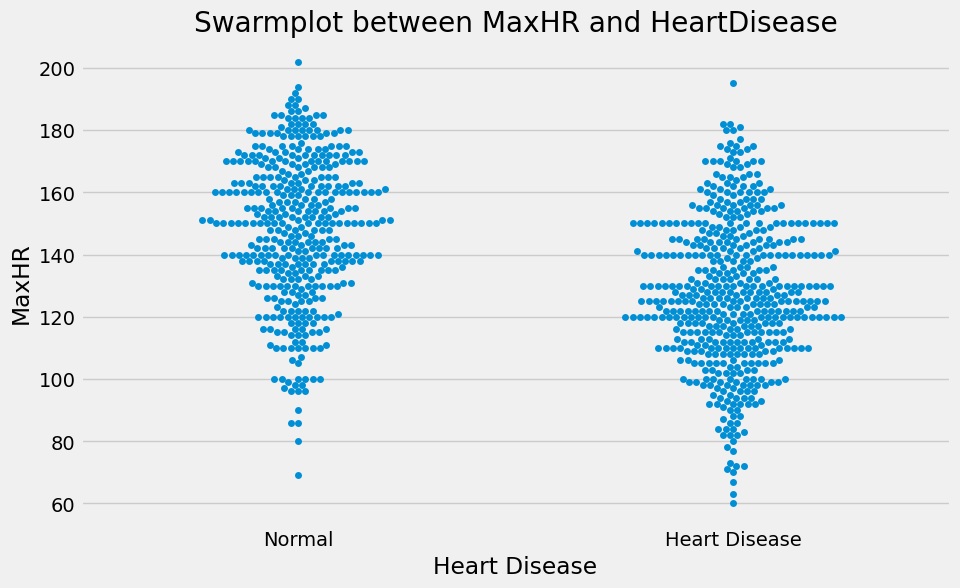

In [11]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'HeartDisease', y = 'MaxHR', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Swarmplot between MaxHR and HeartDisease')
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')


Text(40.95833333333333, 0.5, 'Oldpeak')

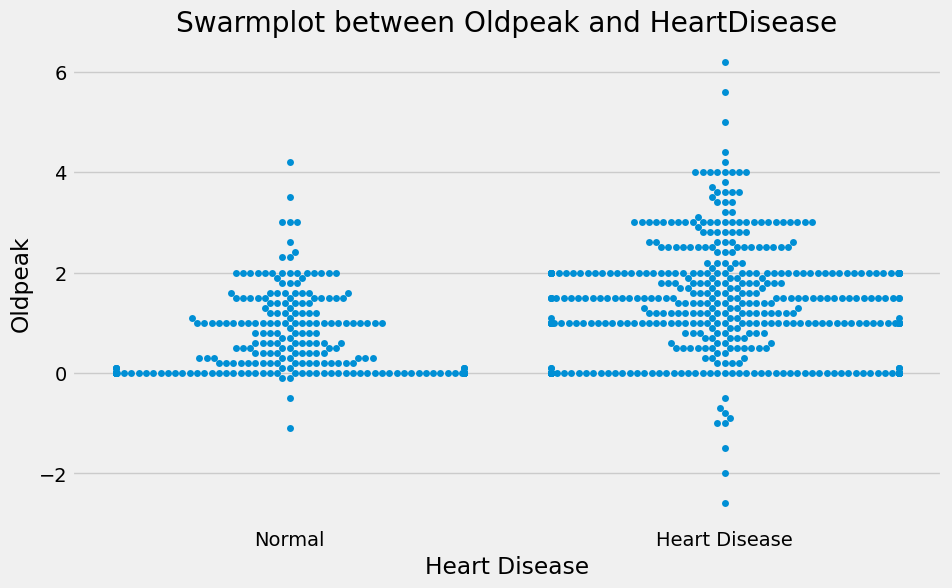

In [12]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'HeartDisease', y = 'Oldpeak', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Swarmplot between Oldpeak and HeartDisease')
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')

Text(0, 0.5, 'RestingBP')

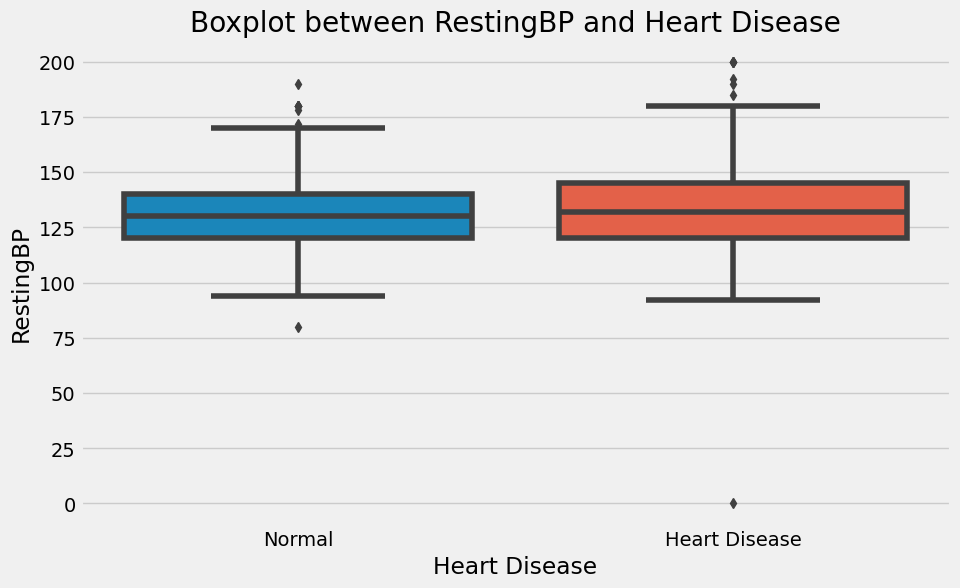

In [13]:
#create the box plot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'HeartDisease', y = 'RestingBP', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Boxplot between RestingBP and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('RestingBP')

In [14]:
#preprocessing function
def preprocessing(data):
    data=data.copy()
    
    #encoding categorical features
    label_encoder = LabelEncoder()
    for column in ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]:
        data[column] = label_encoder.fit_transform(data[column])
    
    #splitting data to train and test
    x = data.drop("HeartDisease", axis = 1)
    y = data["HeartDisease"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)
    
    #scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, x_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = preprocessing(df)

In [16]:
#all models we will apply
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": xgb.XGBClassifier(),
}

#applying the models and Classification Reports
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("="*50)

Logistic Regression: Accuracy = 0.85

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Decision Tree: Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184

Random Forest: Accuracy = 0.89

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88   